In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
img = imread('1024.jpg')

Waktu eksekusi sequential: 15.0210 detik


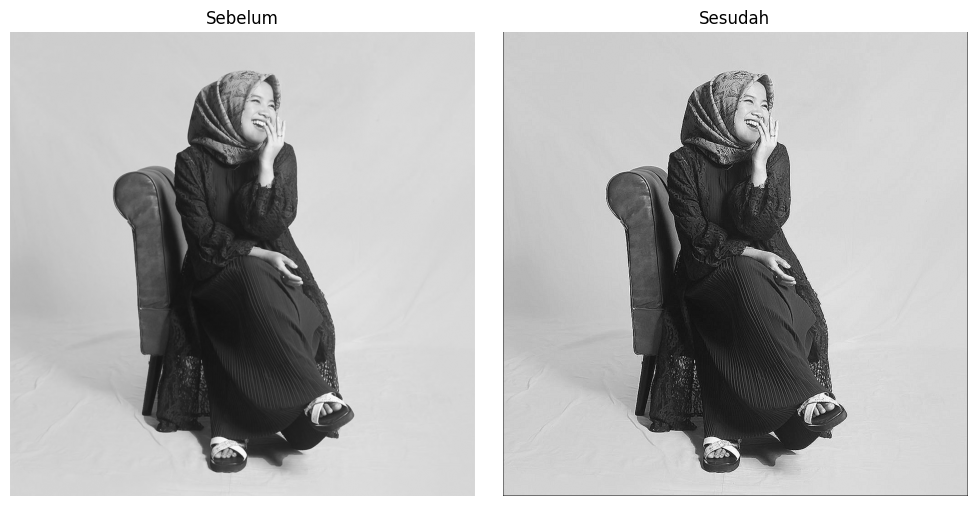

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.image import imread

def sharpen_image_sequential(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    h, w = image.shape
    output = np.zeros_like(image)
    for y in range(1, h-1):
        for x in range(1, w-1):
            acc = 0
            for ky in range(-1, 2):
                for kx in range(-1, 2):
                    acc += kernel[ky+1, kx+1] * image[y+ky, x+kx]
            output[y, x] = np.clip(acc, 0, 255)
    return output

# Membaca gambar 256.jpg (pastikan file ada di direktori kerja)
image = img
if image.ndim == 3:
    image_gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
else:
    image_gray = image.astype(np.uint8)

start_time = time.time()
sharpened_image = sharpen_image_sequential(image_gray)
end_time = time.time()
elapsed_time_seq = end_time - start_time
print(f"Waktu eksekusi sequential: {elapsed_time_seq:.4f} detik")

# Menampilkan gambar sebelum dan sesudah
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Sebelum')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sesudah')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Waktu eksekusi Numba paralel: 3.3204 detik


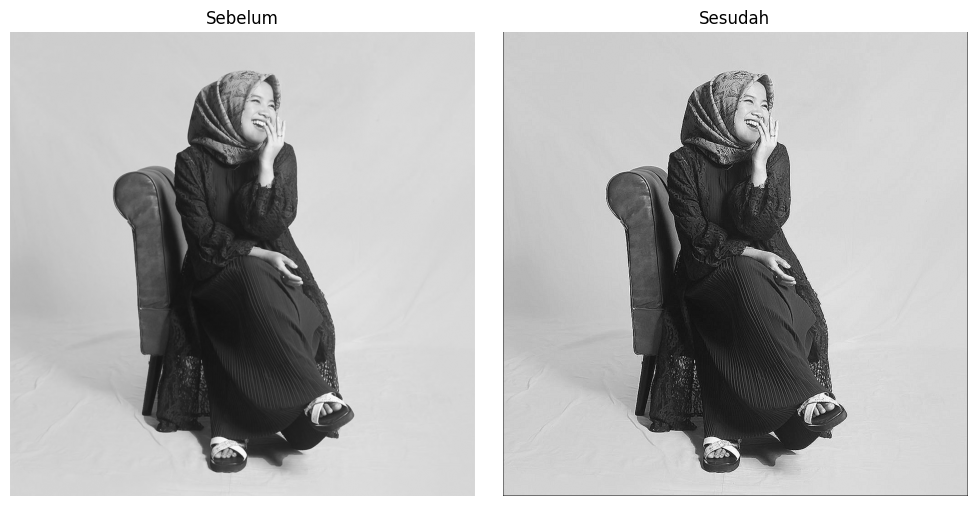

In [8]:
from numba import njit, prange
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.image import imread

@njit(parallel=True)
def sharpen_image_numba(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    h, w = image.shape
    output = np.zeros_like(image)
    for y in prange(1, h-1):
        for x in range(1, w-1):
            acc = 0
            for ky in range(-1, 2):
                for kx in range(-1, 2):
                    acc += kernel[ky+1, kx+1] * image[y+ky, x+kx]
            output[y, x] = min(max(acc, 0), 255)
    return output



# Membaca gambar 256.jpg (pastikan file ada di direktori kerja)
image = img
if image.ndim == 3:
    image_gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
else:
    image_gray = image.astype(np.uint8)

start_time = time.time()
sharpened_image = sharpen_image_numba(image_gray)
end_time = time.time()
elapsed_time_numba = end_time - start_time
print(f"Waktu eksekusi Numba paralel: {elapsed_time_numba:.4f} detik")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Sebelum')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sesudah')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Ukuran gambar input: 1024x1024

--- Pengujian Versi Vektorisasi ---
Waktu eksekusi Vektorisasi: 0.0240 detik


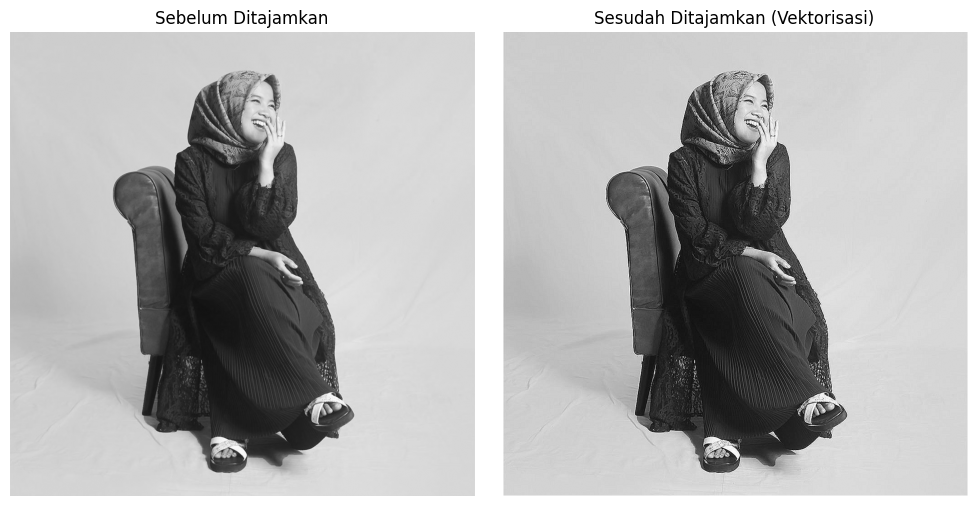

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.ndimage import convolve

def sharpen_image_vectorized(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    sharpened_image = convolve(image.astype(float), kernel, mode='constant')

    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

    return sharpened_image

image = img

if image.ndim == 3:
    image_gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
else:
    image_gray = image.astype(np.uint8)

print(f"Ukuran gambar input: {image_gray.shape[0]}x{image_gray.shape[1]}")

print("\n--- Pengujian Versi Vektorisasi ---")
start_time_vec = time.time()
sharpened_image_vec = sharpen_image_vectorized(image_gray)
end_time_vec = time.time()
elapsed_time_vec = end_time_vec - start_time_vec
print(f"Waktu eksekusi Vektorisasi: {elapsed_time_vec:.4f} detik")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Sebelum Ditajamkan')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sesudah Ditajamkan (Vektorisasi)')
plt.imshow(sharpened_image_vec, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Memulai benchmark untuk tiga implementasi...
Jumlah CPU cores: 12

Memproses gambar ukuran: 256x256
Gambar berhasil dibaca. Dimensi: (256, 256)
Menjalankan implementasi Sequential...
  Waktu eksekusi Sequential: 0.9815 detik
Menjalankan implementasi Numba...
  Waktu eksekusi Numba: 0.0020 detik
Menjalankan implementasi Vectorized...
  Waktu eksekusi Vectorized: 0.0020 detik

Memproses gambar ukuran: 512x512
Gambar berhasil dibaca. Dimensi: (512, 512)
Menjalankan implementasi Sequential...
  Waktu eksekusi Sequential: 4.0421 detik
Menjalankan implementasi Numba...
  Waktu eksekusi Numba: 0.0001 detik
Menjalankan implementasi Vectorized...
  Waktu eksekusi Vectorized: 0.0145 detik

Memproses gambar ukuran: 1024x1024
Gambar berhasil dibaca. Dimensi: (1024, 1024)
Menjalankan implementasi Sequential...
  Waktu eksekusi Sequential: 16.2803 detik
Menjalankan implementasi Numba...
  Waktu eksekusi Numba: 0.0058 detik
Menjalankan implementasi Vectorized...
  Waktu eksekusi Vectorized: 0.0345 de

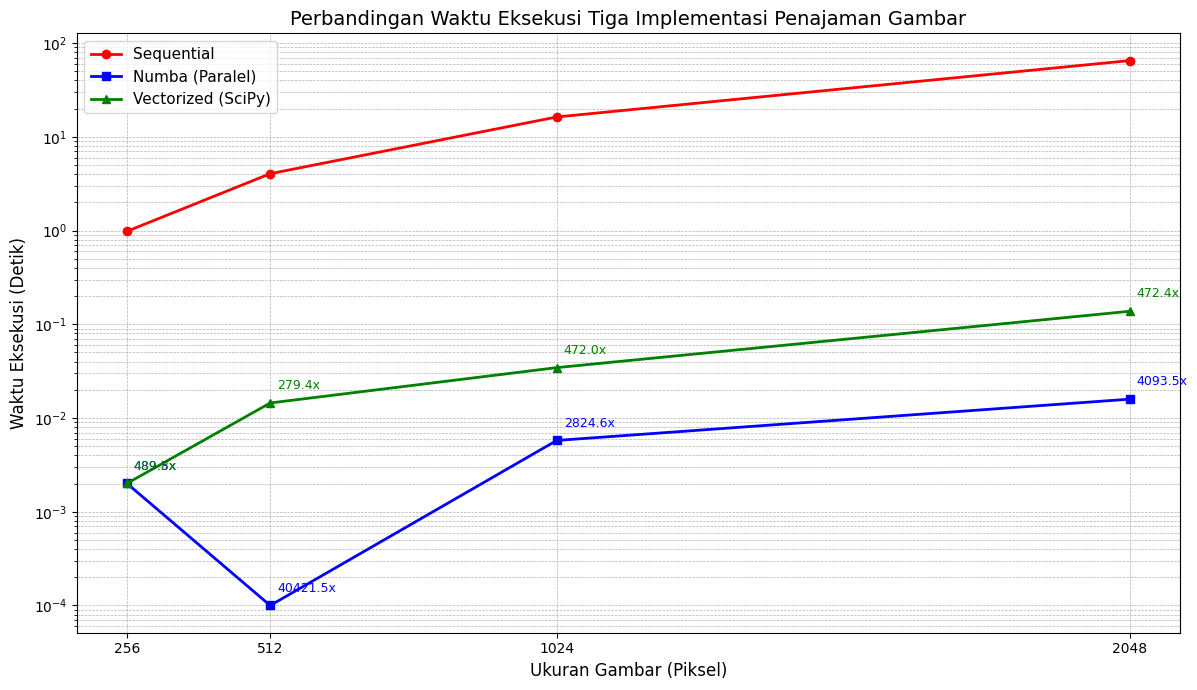


--- Tabel Perbandingan Speedup ---
| Ukuran Gambar | Sequential (ms) | Numba (ms) | Vectorized (ms) | Speedup Numba | Speedup Vectorized |
|---------------|-----------------|------------|-----------------|---------------|-------------------|
| 256x256 | 981.49 | 2.01 | 2.00 | 489.49x | 489.79x |
| 512x512 | 4042.15 | 0.10 | 14.47 | 40421.45x | 279.37x |
| 1024x1024 | 16280.31 | 5.76 | 34.49 | 2824.59x | 472.04x |
| 2048x2048 | 65057.89 | 15.89 | 137.73 | 4093.50x | 472.37x |


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from matplotlib.image import imread

# Asumsi bahwa ketiga fungsi telah didefinisikan di sel sebelumnya
# (sharpen_image_sequential, sharpen_image_numba, sharpen_image_vectorized)

# Daftar ukuran gambar yang akan diuji
problem_sizes = [256, 512, 1024, 2048]  # Ukuran gambar (lebar/tinggi)

# List untuk menyimpan waktu eksekusi
vanilla_times = []
numba_times = []
vectorized_times = []

print("Memulai benchmark untuk tiga implementasi...")
print(f"Jumlah CPU cores: {os.cpu_count()}")

for size in problem_sizes:
    print(f"\nMemproses gambar ukuran: {size}x{size}")
    try:
        # Coba membaca gambar dengan ukuran yang sesuai
        image_path = f'{size}.jpg'
        image = imread(image_path)
        
        # Konversi ke grayscale jika gambar berwarna
        if image.ndim == 3:
            image_gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
        else:
            image_gray = image.astype(np.uint8)
        
        print(f"Gambar berhasil dibaca. Dimensi: {image_gray.shape}")
        
        # 1. Pengukuran waktu untuk implementasi Sequential
        print("Menjalankan implementasi Sequential...")
        start_time = time.time()
        _ = sharpen_image_sequential(image_gray.copy())
        end_time = time.time()
        elapsed_time_seq = end_time - start_time
        vanilla_times.append(elapsed_time_seq)
        print(f"  Waktu eksekusi Sequential: {elapsed_time_seq:.4f} detik")
        
        # 2. Pengukuran waktu untuk implementasi Numba
        print("Menjalankan implementasi Numba...")
        # Panggil sekali dulu untuk menghindari overhead kompilasi
        _ = sharpen_image_numba(np.zeros((10, 10), dtype=np.uint8))
        
        start_time = time.time()
        _ = sharpen_image_numba(image_gray.copy())
        end_time = time.time()
        elapsed_time_numba = end_time - start_time
        # Pastikan waktu eksekusi tidak nol (minimal 0.0001 detik untuk menghindari div by zero)
        elapsed_time_numba = max(elapsed_time_numba, 0.0001)
        numba_times.append(elapsed_time_numba)
        print(f"  Waktu eksekusi Numba: {elapsed_time_numba:.4f} detik")
        
        # 3. Pengukuran waktu untuk implementasi Vectorized
        print("Menjalankan implementasi Vectorized...")
        start_time = time.time()
        _ = sharpen_image_vectorized(image_gray.copy())
        end_time = time.time()
        elapsed_time_vec = end_time - start_time
        # Pastikan waktu eksekusi tidak nol (minimal 0.0001 detik untuk menghindari div by zero)
        elapsed_time_vec = max(elapsed_time_vec, 0.0001)
        vectorized_times.append(elapsed_time_vec)
        print(f"  Waktu eksekusi Vectorized: {elapsed_time_vec:.4f} detik")
        
    except FileNotFoundError:
        print(f"  ERROR: File gambar {image_path} tidak ditemukan!")
        vanilla_times.append(None)
        numba_times.append(None)
        vectorized_times.append(None)
    except Exception as e:
        print(f"  ERROR: {str(e)}")
        vanilla_times.append(None)
        numba_times.append(None)
        vectorized_times.append(None)

# Menampilkan data yang diperoleh
print("\n--- Hasil Pengukuran Waktu ---")
print(f"Ukuran gambar (piksel): {problem_sizes}")
print(f"Waktu Sequential (detik): {vanilla_times}")
print(f"Waktu Numba (detik): {numba_times}")
print(f"Waktu Vectorized (detik): {vectorized_times}")

# Membuat plot
plt.figure(figsize=(12, 7))

# Hanya plot data yang valid (tidak None)
valid_sizes = []
valid_vanilla = []
valid_numba = []
valid_vectorized = []

for i, size in enumerate(problem_sizes):
    if None not in [vanilla_times[i], numba_times[i], vectorized_times[i]]:
        valid_sizes.append(size)
        valid_vanilla.append(vanilla_times[i])
        valid_numba.append(numba_times[i])
        valid_vectorized.append(vectorized_times[i])

# Plot data
plt.plot(valid_sizes, valid_vanilla, marker='o', linestyle='-', color='red', linewidth=2, label='Sequential')
plt.plot(valid_sizes, valid_numba, marker='s', linestyle='-', color='blue', linewidth=2, label='Numba (Paralel)')
plt.plot(valid_sizes, valid_vectorized, marker='^', linestyle='-', color='green', linewidth=2, label='Vectorized (SciPy)')

# Konfigurasi plot
plt.title('Perbandingan Waktu Eksekusi Tiga Implementasi Penajaman Gambar', fontsize=14)
plt.xlabel('Ukuran Gambar (Piksel)', fontsize=12)
plt.ylabel('Waktu Eksekusi (Detik)', fontsize=12)
plt.xticks(valid_sizes, fontsize=10)
plt.yscale('log')  # Skala logaritmik untuk rentang waktu yang besar
plt.legend(fontsize=11)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

# Menambahkan anotasi speedup dengan pengecekan untuk menghindari division by zero
if len(valid_sizes) > 0:
    for i, size in enumerate(valid_sizes):
        # Speedup Numba vs Sequential
        if valid_numba[i] > 0:  # Cek untuk menghindari pembagian dengan nol
            speedup_numba = valid_vanilla[i] / valid_numba[i]
            plt.annotate(f"{speedup_numba:.1f}x", 
                        xy=(size, valid_numba[i]), 
                        xytext=(5, 10), 
                        textcoords='offset points',
                        fontsize=9,
                        color='blue')
        
        # Speedup Vectorized vs Sequential
        if valid_vectorized[i] > 0:  # Cek untuk menghindari pembagian dengan nol
            speedup_vec = valid_vanilla[i] / valid_vectorized[i]
            plt.annotate(f"{speedup_vec:.1f}x", 
                        xy=(size, valid_vectorized[i]), 
                        xytext=(5, 10), 
                        textcoords='offset points',
                        fontsize=9,
                        color='green')

# Menyimpan gambar
plt.savefig('perbandingan_tiga_implementasi.png', dpi=300)
plt.show()

# Tambahan: Membuat tabel perbandingan dengan pengecekan division by zero
print("\n--- Tabel Perbandingan Speedup ---")
print("| Ukuran Gambar | Sequential (ms) | Numba (ms) | Vectorized (ms) | Speedup Numba | Speedup Vectorized |")
print("|---------------|-----------------|------------|-----------------|---------------|-------------------|")

for i, size in enumerate(valid_sizes):
    seq_ms = valid_vanilla[i] * 1000
    numba_ms = valid_numba[i] * 1000
    vec_ms = valid_vectorized[i] * 1000
    
    # Penghitungan speedup dengan pengecekan untuk menghindari pembagian dengan nol
    speedup_numba = valid_vanilla[i] / valid_numba[i] if valid_numba[i] > 0 else float('inf')
    speedup_vec = valid_vanilla[i] / valid_vectorized[i] if valid_vectorized[i] > 0 else float('inf')
    
    # Format untuk ditampilkan
    numba_speedup_str = f"{speedup_numba:.2f}x" if speedup_numba != float('inf') else "∞"
    vec_speedup_str = f"{speedup_vec:.2f}x" if speedup_vec != float('inf') else "∞"
    
    print(f"| {size}x{size} | {seq_ms:.2f} | {numba_ms:.2f} | {vec_ms:.2f} | {numba_speedup_str} | {vec_speedup_str} |")